# Emma Watson twitter sentiments analysis

### In this notebook I'll be using VADAR as the base package for sentiments analysis 

### It's christmas season and I just had a marathon of Harry Potter 7 seasons! Watching the cast grew up along the series inspired me to do a review of how they are in real life, and the closest proxy would be Twitter - I selected Emma Watson purely because it's a personal bias :)

In [3]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import json

In [4]:
twitter_cred = dict()

# Enter your own consumer_key, consumer_secret, access_key and access_secret
# Replacing the stars ("********")

twitter_cred['CONSUMER_KEY'] = 'xx'
twitter_cred['CONSUMER_SECRET'] = 'xx'
twitter_cred['ACCESS_KEY'] = 'xx'
twitter_cred['ACCESS_SECRET'] = 'xx'

# Save the information to a json so that it can be reused in code without exposing
# the secret info to public

with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

### Username search

In [14]:
import tweepy
import csv
import json

# load Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']


def get_all_tweets(screen_name):

    # Twitter allows access to only 3240 tweets via this method

    # Authorization and initialization

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    # initialization of a list to hold all Tweets

    all_the_tweets = []

    # We will get the tweets with multiple requests of 200 tweets each

    new_tweets = api.user_timeline(screen_name=screen_name, count=200)

    # saving the most recent tweets

    all_the_tweets.extend(new_tweets)

    # save id of 1 less than the oldest tweet

    oldest_tweet = all_the_tweets[-1].id - 1

    # grabbing tweets till none are left

    while len(new_tweets) > 0:
        # The max_id param will be used subsequently to prevent duplicates
        new_tweets = api.user_timeline(screen_name=screen_name,
                count=200, max_id=oldest_tweet)

        # save most recent tweets

        all_the_tweets.extend(new_tweets)

        # id is updated to oldest tweet - 1 to keep track

        oldest_tweet = all_the_tweets[-1].id - 1
        print ('...%s tweets have been downloaded so far' % len(all_the_tweets))

    # transforming the tweets into a 2D array that will be used to populate the csv

    outtweets = [[tweet.id_str, tweet.created_at,
                 tweet.text.encode('utf-8')] for tweet in all_the_tweets]

    # writing to the csv file

    with open(screen_name + '_tweets.csv', 'w', encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'created_at', 'text'])
        writer.writerows(outtweets)


if __name__ == '__main__':

    # Enter the twitter handle of the person concerned

    get_all_tweets(input("Enter the twitter handle of the person whose tweets you want to download:- "))

Enter the twitter handle of the person whose tweets you want to download:- emmawatson
...399 tweets have been downloaded so far
...597 tweets have been downloaded so far
...793 tweets have been downloaded so far
...991 tweets have been downloaded so far
...1189 tweets have been downloaded so far
...1385 tweets have been downloaded so far
...1584 tweets have been downloaded so far
...1668 tweets have been downloaded so far
...1668 tweets have been downloaded so far


### Image downloads

In [15]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# import wget

# #Twitter Authentication
# with open('twitter_credentials.json') as cred_data:
#     info = json.load(cred_data)
#     consumer_key = info['CONSUMER_KEY']
#     consumer_secret = info['CONSUMER_SECRET']
#     access_token = info['ACCESS_KEY']
#     access_secret = info['ACCESS_SECRET']

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# #Creating tweepy api
# api = tweepy.API(auth)

# user = \
#     input("Enter twitter user_id - "
#           )

# #Getting all tweets
# all_tweets = api.user_timeline(screen_name=user, count=200,
#                            include_rts=False, exclude_replies=True)

# last_tweet_id = all_tweets[-1].id

# #Getting more tweets
# while True:
#     more_tweets = api.user_timeline(screen_name=user, count=200,
#                                     include_rts=False,
#                                     exclude_replies=True,
#                                     max_id=last_tweet_id - 1)

#     if len(more_tweets) == 0:
#         break
#     else:
#         last_tweet_id = more_tweets[-1].id - 1
#         all_tweets = all_tweets + more_tweets

# image_files = set()
# for status in all_tweets:
#     media = status.entities.get('media', [])
#     if len(media) > 0:
#         image_files.add(media[0]['media_url'])

# print ('Downloading ' + str(len(image_files)) + ' images.....')
# for image_file in image_files:
#     wget.download(image_file)

### Hashtag search

In [16]:
# import tweepy
# import csv
# import json

# # Twitter API credentials

# with open('twitter_credentials.json') as cred_data:
#     info = json.load(cred_data)
#     consumer_key = info['CONSUMER_KEY']
#     consumer_secret = info['CONSUMER_SECRET']
#     access_key = info['ACCESS_KEY']
#     access_secret = info['ACCESS_SECRET']

# # Create the api endpoint

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# api = tweepy.API(auth)

# # Mention the maximum number of tweets that you want to be extracted.

# maximum_number_of_tweets_to_be_extracted = \
#     int(input('Enter the number of tweets that you want to extract- '))

# # Mention the hashtag that you want to look out for

# hashtag = input('Enter the hashtag you want to scrape- ')

# for tweet in tweepy.Cursor(api.search, q='#' + hashtag,
#                            rpp=100).items(maximum_number_of_tweets_to_be_extracted):
#     with open('tweets_with_hashtag_' + hashtag + '.txt', 'a') as \
#         the_file:
#         the_file.write(str(tweet.text.encode('utf-8')) + '\n')

# print ('Extracted ' + str(maximum_number_of_tweets_to_be_extracted) \
#     + ' tweets with hashtag #' + hashtag)

In [2]:
import pandas as pd
df = pd.read_csv('EmmaWatson_tweets.csv')
df.head()

,id,created_at,text
0,1076065380840419328,2018-12-21 10:42:33,b'\xf0\x9f\x90\xb1 https://t.co/wNDcIE42Qu'
1,1075841546732359680,2018-12-20 19:53:07,b'RT @TIMESUPNOW: We are relieved that Harvey ...
2,1075438063776657408,2018-12-19 17:09:49,b'\xf0\x9f\x8e\xa5\xe2\x9d\xa4\xef\xb8\x8f @Li...
3,1073610366524014592,2018-12-14 16:07:12,b'RT @freesafelegal: Today we see the culminat...
4,1073266457058967554,2018-12-13 17:20:38,b'\xe2\x80\x9cI could never love anyone as I l...


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [4]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
    print("{:-<40} {}".format(sentence, str(score)))

In [5]:
# New column text2 to house all the tweet scores
df['text2'] = df['text'].apply(sentiment_analyzer_scores)

In [6]:
# Function to derive compound values
def compound_extraction(sentiment_scores):
    return sentiment_scores['compound']
    

In [7]:
# Selecting items from dictionery
# New column text2 to house all the tweet scores
df['sentiments'] = df['text2'].apply(compound_extraction)

In [8]:
# top sentiments
df.sort_values(by=['sentiments'],ascending = False).head()

,id,created_at,text,text2,sentiments
1303,305466086424461312,2013-02-23 23:56:04,b'The Perks of Being a Wallflower just won bes...,"{'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'comp...",0.9741
1335,286492156913397760,2013-01-02 15:20:27,b'Bit late on the New Years tweet but it was s...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.9676
1228,350243571288383489,2013-06-27 13:25:49,b'@Mattdavelewis happy birthday to you happy b...,"{'neg': 0.0, 'neu': 0.434, 'pos': 0.566, 'comp...",0.9600
1602,98101632293806080,2011-08-01 18:43:46,"b""Hi guys, just wanted to say thank you for al...","{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.9495
1666,19073853830,2010-07-21 12:51:24,"b""Thank you for all your lovely (and amusing) ...","{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp...",0.9492


In [9]:
# worse sentiments
df.sort_values(by=['sentiments'],ascending = True).head()

,id,created_at,text,text2,sentiments
211,802297413927047168,2016-11-25 23:46:24,"b""RT @UN_Women: For Int'ntl Day to End Violenc...","{'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'comp...",-0.9029
964,501467590230044672,2014-08-18 20:36:04,"b""'Suicide is the biggest killer of men betwee...","{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...",-0.9001
719,633675525916073985,2015-08-18 16:23:13,b'Courage is the choice and willingness to con...,"{'neg': 0.574, 'neu': 0.338, 'pos': 0.089, 'co...",-0.8885
291,755446570888364032,2016-07-19 16:57:52,b'RT @liviafirth: Rana Plaza collapse: 38 char...,"{'neg': 0.409, 'neu': 0.591, 'pos': 0.0, 'comp...",-0.8658
196,809762000196739073,2016-12-16 14:08:00,b'RT @HouseofCommons: MPs vote 135 to 2 to app...,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",-0.8519


In [10]:
# examining text for top sentiments from Emma Watson
pd.options.display.max_colwidth = 200
df.sort_values(by=['sentiments'],ascending = False).head()['text']

1303    b'The Perks of Being a Wallflower just won best first feature at the Independent Spirit Awards and I am SO proud. I love our movie so much : )'
1335       b'Bit late on the New Years tweet but it was so blissful forgetting about my phone for a while. Happy New Years fellow squawkers. Much love'
1228                b'@Mattdavelewis happy birthday to you happy birthday to you happy birthday dear Matt happy birthday to you !!! \xf0\x9f\x90\xa5Xx'
1602    b"Hi guys, just wanted to say thank you for all the messages about how much you liked DH2. I'm so happy with it - a worthy end! Enjoy summer!x"
1666         b"Thank you for all your lovely (and amusing) messages! It's official: I have the best fans! I'm loving the London sunshine today, Emma x"
Name: text, dtype: object

In [82]:
# filter time period
start = 2015
end = 2018
df2 = df
df2['date2']= pd.to_datetime(df['created_at'])

def extract_year(i):
    return i.year
# extract year from datetime
df['date']= df['date2'].apply(extract_year)

df3 = df2[df2['date'].between(start, end, inclusive=True)]
df3['month_year'] = pd.to_datetime(df3['date2'])

/Users/soonleqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


## Plotting the sentiments level from 2015 - 2018

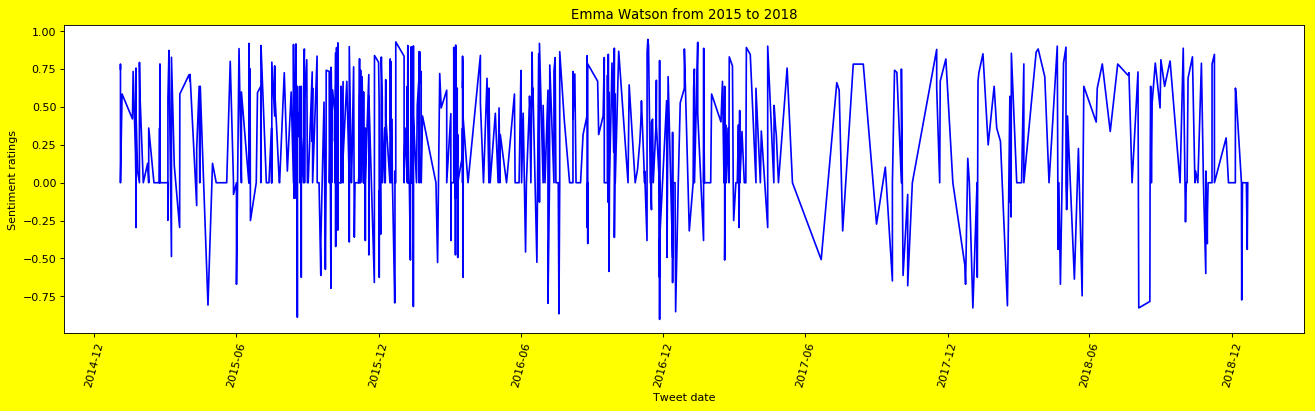

In [83]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig=plt.figure(figsize=(20, 5), dpi= 80, facecolor='yellow', edgecolor='w')

plt.plot(df3['month_year'], df3['sentiments'], color='blue')
plt.xlabel('Tweet date')
plt.ylabel('Sentiment ratings')
plt.title('Emma Watson from {} to {}'.format(start,end))
myFmt = DateFormatter("%m/%d") 
plt.xticks(rotation=75)

plt.show();

In [84]:
very_neg = len(df3[(df3['sentiments'] < -0.5)])
neg = len(df3[(df3['sentiments'] >= -0.5) & (df3['sentiments'] < 0)])
very_pos = len(df3[(df3['sentiments'] > 0.5)])
pos= len(df3[(df3['sentiments'] > 0) & (df3['sentiments'] <= 0.5)])

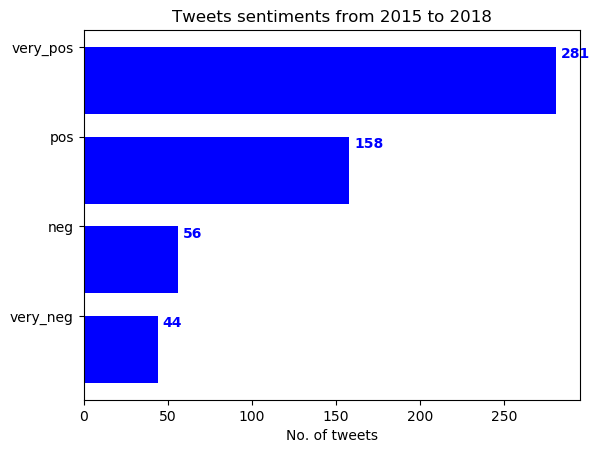

In [102]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('very_neg', 'neg', 'pos', 'very_pos')
y_pos = np.arange(len(objects))
performance = [very_neg,neg,pos,very_pos]
    
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ax.barh(y_pos, performance, width, color="blue")
ax.set_yticks(y_pos+width/2)
ax.set_yticklabels(objects, minor=False)    

for i, v in enumerate(performance):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')


# plt.barh(y_pos, performance, align='center', alpha=0.5)
# plt.yticks(y_pos, objects)
plt.xlabel('No. of tweets')
plt.title('Tweets sentiments from {} to {}'.format(start,end))
plt.show()

### As we can see, from 2015-2018. Emma Watson's tweets are way more positive than negative. Further examination can be done on what types of postivity does she tweet but it's probably unnecessary, knowing that she has received positive reviews as a feminism ambassador & has acheived huge sucesses in mega box office movies.